##LINEAR REGRESSION:


**Importing the libraries and Reading the dataset:**

In [ ]:
#Importing all Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

### explore the dataset

In [ ]:
#Load dataset
wine_dataset = pd.read_csv('wine_quality.csv')
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
len(wine_dataset.index)

6497

In [ ]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
print((wine_dataset.isnull()).sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [ ]:
wine_dataset.quality.value_counts().sort_index()

,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


### Preprocessing

In [ ]:
# since type of wine should not be an indicator of wine quality, we drop this col.
wine_dataset.drop(['type'], axis=1, inplace=True)

# another option is to use it, so we need to convert it into numerical values
# wine_dataset['type'] = wine_dataset['type'].map({'white': 1, 'red': 0})

In [ ]:
cols = wine_dataset.columns

In [ ]:
## since there are just a few lines containing missing values, we can simply drop those rows.
# wine_dataset.dropna(subset = cols, inplace=True)

# print((wine_dataset.isnull()).sum())
# len(wine_dataset.index)

In [ ]:
wine_dataset.eq(0).sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,150
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
## if citric acid cannot be 0
# wine_dataset['citric acid'] = wine_dataset['citric acid'].replace(0, np.nan)
# print((wine_dataset.isnull()).sum())

##Data Partitioning:

In [ ]:
X = wine_dataset.drop(['quality'], axis = 1)
y = wine_dataset['quality']

In [ ]:
feature_names = X.columns
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
# Spliting data into test data and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##Imputation:

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)

# imputer.fit(X_train)
# X_train = imputer.transform(X_train)

X_test = imputer.transform(X_test)

## Scaling (For comparable feature importances in LR)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# scaler.fit(X_train)
# X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

##Model Implementation:

In [ ]:
# fitting linear regression to training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#To retrieve the intercept
lr.intercept_

5.8145083702135825

In [ ]:
# this gives the coefficients of the 11 features
lr.coef_

array([ 0.09474687, -0.22027793, -0.02769753,  0.2063286 , -0.01270745,
        0.09492274, -0.12659037, -0.16353693,  0.07100231,  0.1126335 ,
        0.31530378])

## Feature importance analysis

In [ ]:
coefficients = lr.coef_
feature_importances = pd.DataFrame(data=coefficients, index=feature_names, columns=['Coefficient'])
feature_importances.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importances)

                      Coefficient
alcohol                  0.315304
residual sugar           0.206329
sulphates                0.112634
free sulfur dioxide      0.094923
fixed acidity            0.094747
pH                       0.071002
chlorides               -0.012707
citric acid             -0.027698
total sulfur dioxide    -0.126590
density                 -0.163537
volatile acidity        -0.220278


## Model performance on test data

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([6.17595485, 6.32644714, 5.60986342, ..., 5.742074  , 5.88871724,
       5.89019189])

In [ ]:
#actual values of the test subset vs the predicted values of the test subset:
results_df = {"original":y_test, "predicted":y_pred}
results = pd.DataFrame(results_df)
print("*** First 5 rows of results ***")
results.head()

*** First 5 rows of results ***


,original,predicted
3772,6,6.175955
6009,7,6.326447
3464,5,5.609863
1518,6,6.371763
3761,7,6.077041


##Evaluation of Model:

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',rmse)
r2 = metrics.r2_score(y_test,y_pred)
print('r2_score:', r2)

Mean Absolute Error: 0.5719961478289955
Mean Squared Error: 0.5315543180017306
Root Mean Squared Error: 0.7290777173948815
r2_score: 0.3239278616325457


##Visualisation of Results:

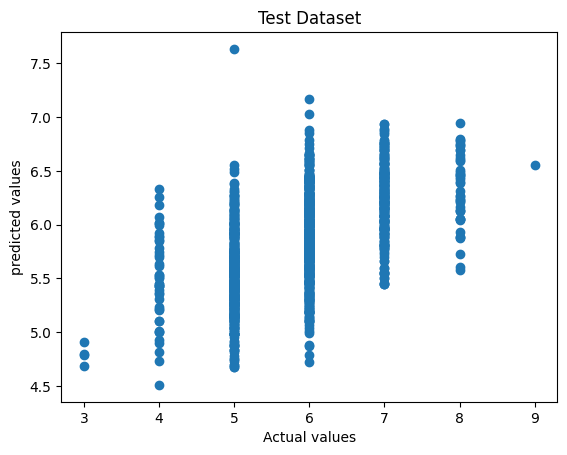

In [ ]:
plt.title("Test Dataset")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("predicted values")
plt.show()

In [ ]:
# Ex1: Using a regression decision tree instead

In [ ]:
# 1. from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# 2. Initialise the DecisionTreeRegressor with a random state = 1 for reproducibility
# tree = ...
tree = DecisionTreeRegressor(random_state=1)

# 3. Fit the Decision Tree Regressor to the training data
tree.fit(X_train, y_train)

# 4. Use the fitted model to make predictions on the test data
# y_pred = ...
y_pred = tree.predict(X_test)

# 5. Calculate and print the Mean Absolute Error (MAE) between the predictions and the true values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',rmse)
r2 = metrics.r2_score(y_test,y_pred)
print('r2_score:', r2)

Mean Absolute Error: 0.4823076923076923
Mean Squared Error: 0.6838461538461539
Root Mean Squared Error: 0.8269499101192006
r2_score: 0.13023125598309382
